<a href="https://colab.research.google.com/github/MonilMehta/Synapse_LP/blob/week2/Synapse_LP_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Synapse Week Two**

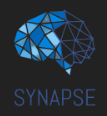

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding. Enough chitchat, lets get to work :P

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

OPTIONAL BUT USEFUL <br>
Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [1]:
!pip install shap -q  #Will be used later on

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mount your Google Drive using the cell below.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Regression

For regression, lets reuse the crab dataset that you worked on last week. Import the dataset from wherever you had saved it in the cell below.
Also print the first 5 rows to ensure you have loaded the dataset correctly.

In [4]:
df_crab = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')


In [5]:
df_crab.shape

(74051, 10)

In [6]:
df_crab.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


Now, let's some employ some Feature Engineering tactics which you would have performed in the previous tasks.

Create a function called crab_processing which takes a dataframe as an input, performs the following tasks, and returns a cleaned and edited df:

1) Drop the 'id' column.

2) Drop all rows where 'Height' of the crab is 0.

3) Create a new column called 'LostWeight' which is calculated using the following formula - ```
Weight - (Shucked + Viscera + Shell)``` .
If this formula gives a number less than 0, then assign 0 to the LostWeight column, else assign 1.

4) Finally, use one hot encoding to encode the column 'Sex'

Take help from your previous task where you have implemented these steps in different cells.


In [7]:
# Your code starts here
def crab_processing(df):
  df.drop('id',axis=1,inplace=True)
  df=df[df['Height']!=0]
  y=lambda x : 0 if x<0 else 1
  lw = df['Weight']-df['Shucked Weight']-df['Viscera Weight']-df['Shell Weight']
  lw1 = [y(x) for x in lw]
  df.insert(8,'Lost Weight',lw1)
  df=pd.get_dummies(data=df,columns=['Sex'])
  #logic for feature engineering
  return df

df_crab = crab_processing(df_crab)
df_crab.head()
# Your code ends here

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Age,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,9,0,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,8,0,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,9,0,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,11,1,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,8,0,1,0


If all is correct, this should be the shape of your df now.

In [8]:
df_crab.shape

(74027, 12)

###Basic Visualization

In this problem, our aim is to predict the age of the crab, hence 'Age' here is called our target variable. To check its distribution, plot a histogram of the 'Age' column.

Choose the number of bins by experimenting. The output is expected to mimic a bell curve.

What is a histogram? - https://www.w3schools.com/python/matplotlib_histograms.asp

Difference between histogram and a bar graph - https://keydifferences.com/difference-between-histogram-and-bar-graph.html

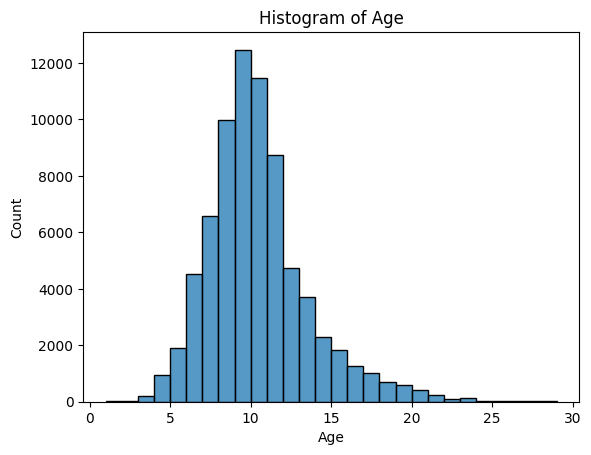

In [9]:
# Your code starts here
sns.histplot(x=df_crab['Age'],fill=True,bins=28)
plt.title('Histogram of Age')

plt.show()
# Your code ends here

###Feature and Variable Sets

As mentioned above, the 'Age' column is what we're gonna be predicting. So essentially we need to create two additional dataframes, one which contains all the training features (All columns except 'Age') and one which only contains the column 'Age'. Name them X and y respectively.

In [10]:
# Your code starts here
X = df_crab.drop('Age',axis=1)
y = df_crab['Age']
# Your code ends here

In [11]:
# This code should print (74027, 11) and (74027, 1) if everything is correct
print(X.shape,y.shape)

(74027, 11) (74027,)


In [12]:
#Print a few records of X
X.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,0,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,0,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,0,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,1,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,0,1,0


In [13]:
#Print a few records of y
y.head()

0     9
1     8
2     9
3    11
4     8
Name: Age, dtype: int64

###Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [14]:
# Import train_test_split Hint: Use sklearn.model_selection
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split


**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**

They should be called X_train, X_test, y_train, y_test

In [15]:
# Your code starts here
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
# Your code ends here

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [16]:
# Your code starts here
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# Your code ends here

(51818, 11)
(22209, 11)
(51818,)
(22209,)


Can you see that the data has been divided into 2 datasets of size 70% and 30% of the original dataset each? Use your calculator to confirm this :)

###Model fit and training

Here is the complete lowdown on SVM (Support Vector Machine):<br>
Theory : https://youtu.be/H9yACitf-KM <br>
Theory: https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/ <br>
Implementation : https://youtu.be/FB5EdxAGxQg

Import SVR (Support Vector Regressor) and its metrics from scikit-learn.

In [17]:
# Add your import statement here
from sklearn.svm import SVR
svr = SVR()
# Create an SVR object 'svr' by calling SVR()


Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable.

Hint: svr.fit()

This might take about a minute or so, just to inform you.

In [18]:
# Your code starts here
svr.fit(X_train,y_train)
# Your code ends here

SVR()

###Prediction, error estimate, and regression evaluation matrices

**Prediction using the svr model**

The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

Use svr.predict() on X_test and store it in a variable called "predictions". Print type and size of the predictions.

Size should be (22009,) if everything is correct.

In [19]:
# Your code starts here
predictions = svr.predict(X_test)
print(type(predictions))
print(predictions.shape)
# Your code ends here

<class 'numpy.ndarray'>
(22209,)


Now that we have our predictions, let's compare it with y_test and see how accurate our predictions are.

Plot a Scatter plot of predicted price and y_test set to see if the data falls on a 45 degree straight line

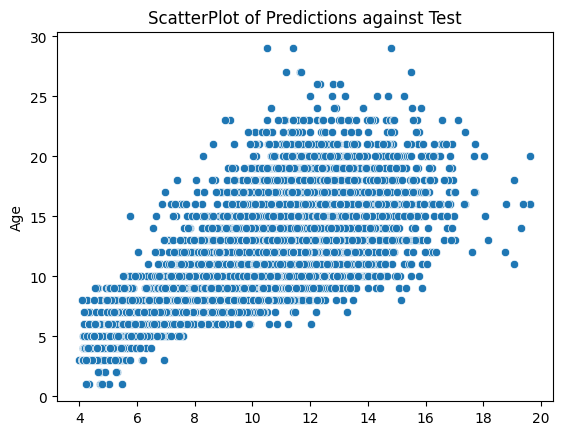

In [20]:
# Your code starts here
sns.scatterplot(x=predictions,y=y_test)
plt.title('ScatterPlot of Predictions against Test')
plt.show()
# Your code ends here

As you can see, it's not perfect, but you can definitely visualize the data lining up at a 45 degree angle.

**Model Evaluation**

We will be exploring the most common regression metric here namely R2 score. You can check out more metrics here: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Here's a video detailing all the popular regression metrics - https://www.youtube.com/watch?v=Ti7c-Hz7GSM

**Print the R-square value and round it to 3 decimal places**

Hint: sklearn metrics.r2_score

In [21]:
# Your code starts here
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

R2 = r2_score(y_test,predictions)

print(f'R2 score is {round(R2,3)}')
# Your code ends here

R2 score is 0.551


In the cell below, explain what the above score means and also elaborate how 'good' is the score in terms of evaluation of the model

->An R2 score of 0.55 or 55% means that model is able to explain the variance for 55% of the total values and considers the behaviour of rest of the 45% irregular. R2 score closer to 1 is said to be good while it is bad approaching 0. Based on this our model would not work well with predicions.MAE tells us how much our predictions are off from the actual values in the dataset.MSE is the average squared difference between the estimated values and true value and RMSE is the square root of it.


In [22]:
#Explore additional metrics here
MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(mean_squared_error(y_test,predictions))
AR2 = 1-((1-R2)*(22209-1)/(22209-1-11))


print(f'Mean absolute error is {MAE}')
print(f'Mean Squared error is {MSE}')
print(f'Root Mean Squared error is {RMSE}')
print(f'Adjusted R2 score is {AR2}')

Mean absolute error is 1.3882442223232698
Mean Squared error is 4.417052881261542
Root Mean Squared error is 2.10167858657349
Adjusted R2 score is 0.5503436024311195


You have succesfully implemented Support Vector Regressor to predict Age of a crab. But is this the only regression model out there? In the cell below, list down 3 more regression models with a basic explanation of how they work. Also include a line explaining in which scenario each model works best.

Your text here

*   Bayesian Linear Regression : It uses the bayes algorithm to estimate the parameters of data.It is particularly useful when we have incomplete or missing data in the dataset.Bayesian Linear Regression allows us to incorporate prior beliefs about the parameters, updating them as more data becomes available.For this model the pyMC3 module is used.We can use bayesian model when the sample size is small and it is also particularly well-suited for on-line based  rather than batch-learning.


*   Polynomial Regression : It is used when the relation between feature and target is not linear and using LinearRegression may lead to overfitting.The equation of the polynomial is y = a0 + a1x1 + a2x1^2 + … + anx1^n.We  use the sklearn library - PolynomialFeatures to train the model.This module transforms the original features into a polynomial space, allowing the use of linear regression to fit a polynomial function to the data.


*   Logistic Regression :  It is mainly used in clasification problems to predict the probability of an object belonging to a particular class.It is used when out target variable is binary(Yes or no,True False).It converts the output to a sigmoid curve t=so that it is between 0 and 1.For it we use the linear model library of sklearn,in which after performing the train test split, LogisticRegression() is used to fit the model and then the output is predicted on X_train data.





###OPTIONAL: Explainability

So you passed some data into a model, and trained it using that data. You then used some other data to test the accuracy of that model, and it now predicts values when you pass in some data. Ok. But how does it REALLY predict that value? How much is it relying on each individual feature column of data that you passed to the model? This is where the concept of explainability comes into picture, where you can understand for each data point, exactly what parameters led the model to predict the value that it has.

Info about explainable AI <br>
https://www.ibm.com/topics/explainable-ai <br>
About shap <br>
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [23]:
#Run this code as it is
from shap import KernelExplainer, force_plot, sample

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


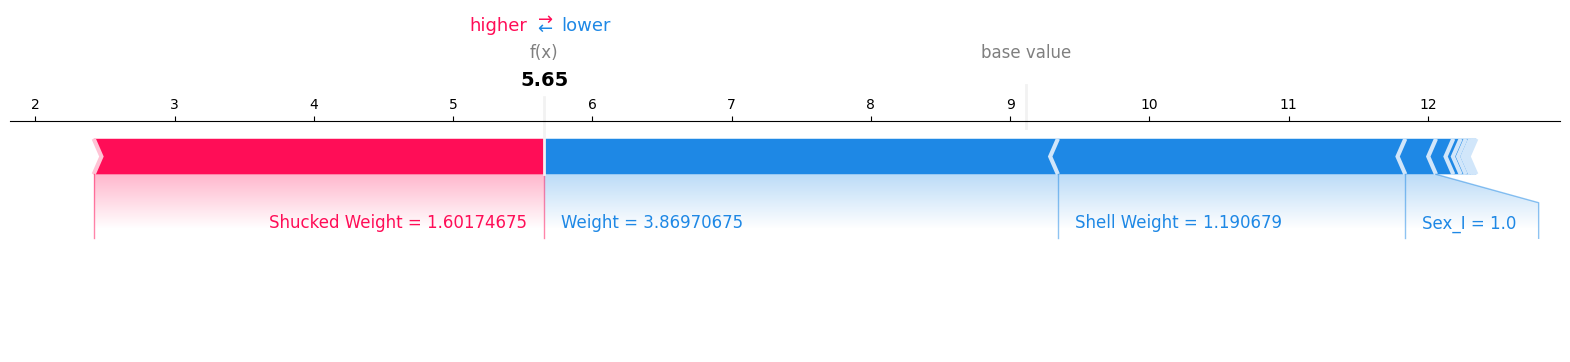

In [24]:
#Run this code as it is
ex = KernelExplainer(svr.predict, sample(X_train, 10))  #only taking sample of 10 values for now
shap_values = ex.shap_values(X_test.iloc[0,:]) #explaining 1st tuple of the X_test dataframe
force_plot(ex.expected_value, shap_values, X_test.iloc[0,:], matplotlib=True)

Can you see how the above plot visualizes which parameters contributed significantly to the prediction, and what were the actual values which led to the prediction?

##Classification

In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1bVOfBJYUr0JtZ7pp1lcyNamnHHXn_fDm/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [25]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/classified_data.txt',index_col=0)
df['TARGET CLASS'].unique()

array([1, 0])

If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

###Basic EDA

In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [26]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [27]:
#describe()
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [28]:
df.shape

(1000, 11)

**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() documentation

Here is some information about boxplots:

Understanding Boxplots:
https://medium.com/analytics-vidhya/introduction-to-box-plots-and-how-to-interpret-them-22464acbcba7 <br>
Comparing two boxplots: https://www.nagwa.com/en/explainers/812192146073/

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


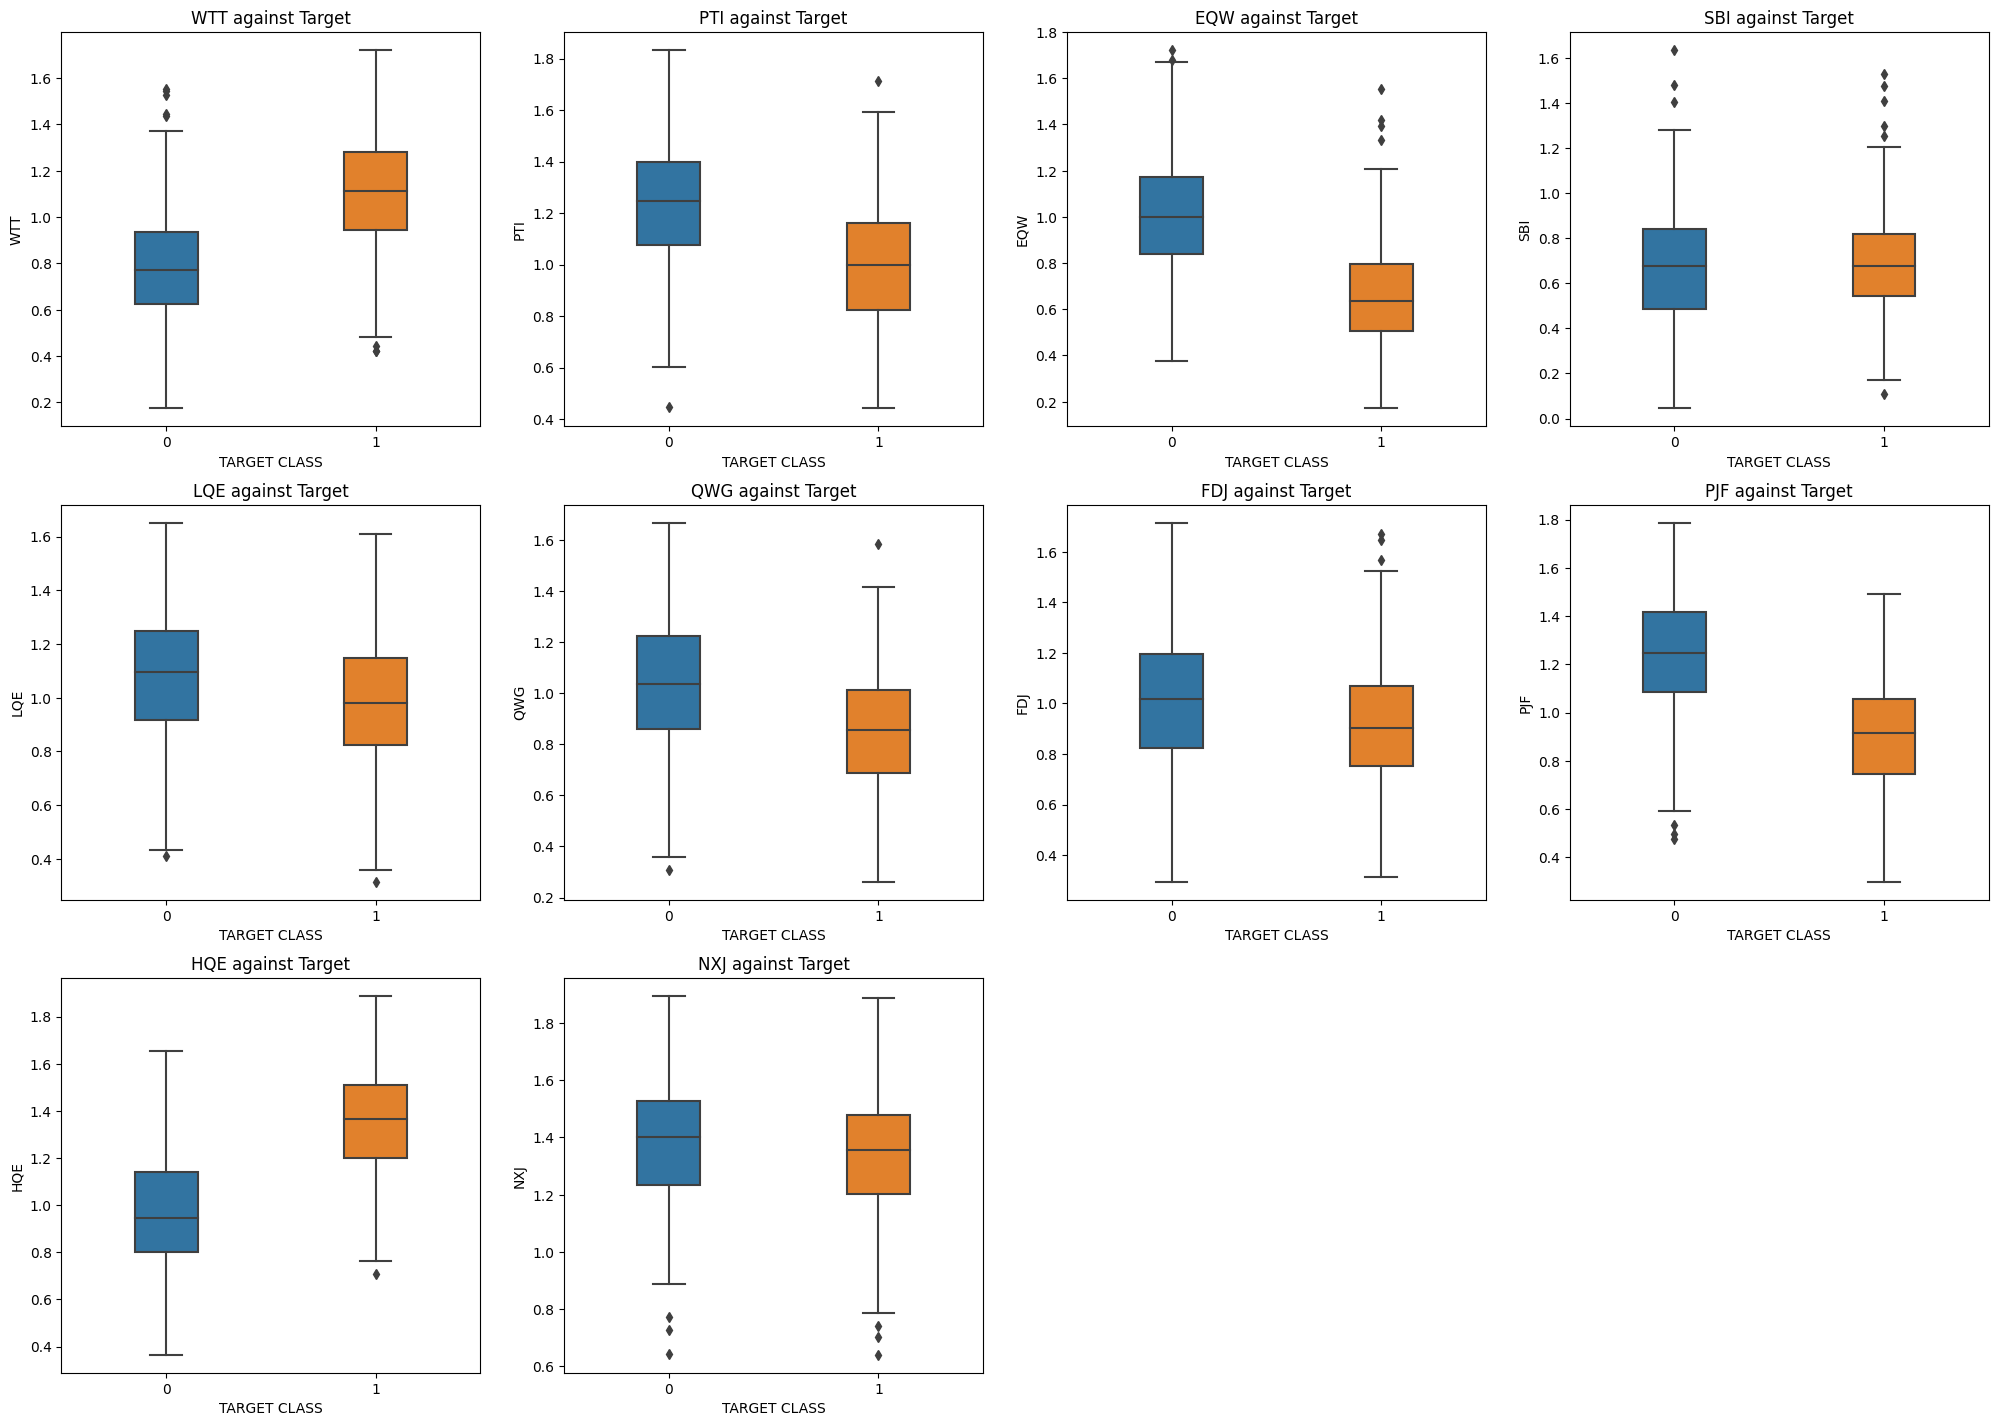

In [29]:
# your code starts here
column_list = df.columns.tolist()
column_list.pop()
rows=3
col=4
df1 = df.copy()
j=1
plt.subplots(figsize=(20, 14))
plt.tight_layout()
for i in column_list:
  plt.subplot(rows,col,j)
  sns.boxplot(y=df1[i],x=df1['TARGET CLASS'],width=0.3,whis=1.5)
  j=j+1
  plt.title(f'{i} against Target')
# your code ends here

What conclusion, if any can you draw from these boxplots?
List them down below.

My conclusion from all these boxplots is to check for outliers as outliers in classification problems can have a significant impact on the performance of ML models as these outliers can cause the decision boundary to distort leading to inaccuracy.

### Standardize the features using sklearn.preprocessing
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization is usually used prior to model fitting.<br><br>

To give you an example, values pertaining to Age usually lie within the range of 1-100, however values pertaining to Salary lie in a much wider range of say 10000-1000000. You can see how having both columns be a part of a classification model as is would lead to an imbalance in importance assigned to columns.
<br><br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [30]:
# your code starts here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# your code ends here

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [31]:
# your code starts here
scaler.fit(df.drop('TARGET CLASS',axis=1))
df_scaled=scaler.transform(df.drop('TARGET CLASS',axis=1))
# your code ends here

**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [32]:
# your code starts here
df_feat = pd.DataFrame(df_scaled,columns=column_list)
df_feat.head()
# your code ends here

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [33]:
# Your code starts here.
X=df_feat.copy()
y=df['TARGET CLASS']
# Your code ends here

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [34]:
# Your code starts here.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
# Your code ends here

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [35]:
# Your code starts here.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
# Your code ends here

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [36]:
# Your code starts here.
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
# Your code ends here

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [37]:
# Your code starts here.
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))
# Your code ends here

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [38]:
# Your code starts here.
from sklearn.metrics import accuracy_score
print(f'Accuracy score is : {round(accuracy_score(y_test,pred),3)}')
# Your code ends here

Accuracy score is : 0.937


Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [39]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list
# Your code starts here.
from sklearn.model_selection import cross_val_score
accuracy_scores=[]
for i in range(1,61):
  knn = KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
  accuracy_scores.append(score.mean())
# Your code ends here

**Plot a graph of K value vs Accuracy**

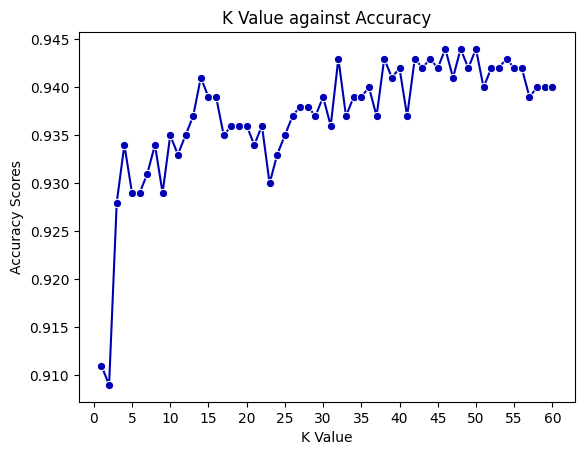

In [40]:
# Your code starts here.
sns.lineplot(x = range(1,61), y = accuracy_scores, marker = 'o',color='#0000b3')
plt.xticks(ticks=range(0,61,5))
plt.xlabel("K Value")
plt.ylabel("Accuracy Scores")
plt.title("K Value against Accuracy")
plt.show()
# Your code ends here

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [41]:
# Your code starts here.
from sklearn.model_selection import cross_val_score
accuracy_scores=[]
for i in range(1,61):
  knn = KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
  accuracy_scores.append(score.mean())
n_neigh_best = np.argmax(accuracy_scores)
n_acc_best = accuracy_scores[n_neigh_best]
print("Best value of n_neighbours:",n_neigh_best+1)
print("Corresponding highest accuracy:",n_acc_best)
# Your code ends here

Best value of n_neighbours: 46
Corresponding highest accuracy: 0.944


In [44]:
#Another Method:
from sklearn.metrics import accuracy_score
scores=[]
for i in range(1,61):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred = knn.predict(X_test)
  scores.append(accuracy_score(y_test,pred))

n_neigh_best = np.argmax(scores)
n_acc_best = scores[n_neigh_best+1]
print("Best value of n_neighbours:",n_neigh_best+1)
print("Corresponding highest accuracy:",n_acc_best)

Best value of n_neighbours: 12
Corresponding highest accuracy: 0.9533333333333334


In [45]:
# Reasons:
#Iterating through the accuracy scores we previously calculated we find the max value out of them and also get its index position + 1
#which is our best Kvalue which is also seen on the lineplot.

# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **Reinforcement Learning**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2023 - 2024

